In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12,9])                   # 指定图片大小
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
sns.set_style('darkgrid')                    # darkgrid,whitegrid,dark,white,ticks

# 1 绘制单变量分布

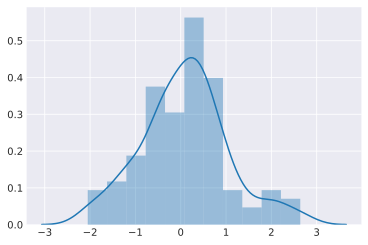

In [2]:
x = np.random.normal(size=100)
sns.distplot(x)

### 直方图

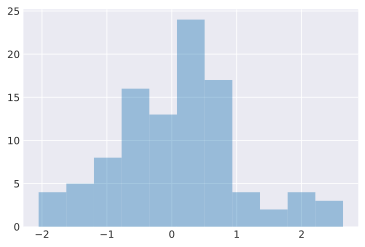

In [3]:
sns.distplot(x,kde=False)

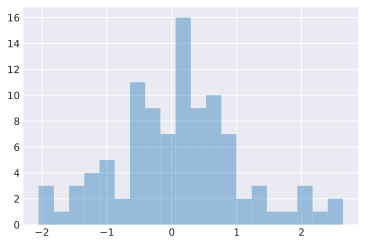

In [4]:
sns.distplot(x,bins=20,kde=False)

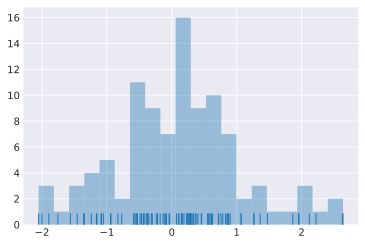

In [5]:
sns.distplot(x,bins=20,kde=False,rug=True)

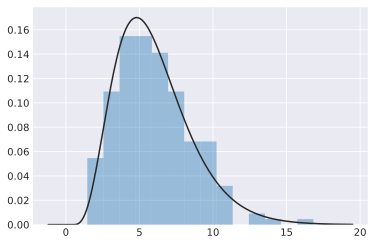

In [10]:
### 数据分布情况
from scipy import stats
x = np.random.gamma(6,size=200)
sns.distplot(x,kde=False,fit=stats.gamma)

### 核密度曲线

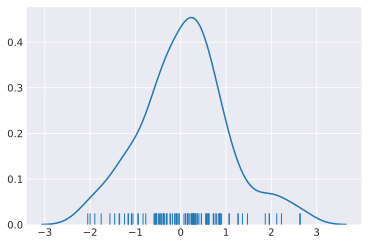

In [6]:
sns.distplot(x, hist=False, rug=True)

# 2 绘制双变量分布

可视化两个变量的二元分布也很有用。在seaborn中最简单的方法是使用该jointplot()函数，该函数创建一个多面板图形，显示两个变量之间的二元（或关节）关系以及每个单独轴上的单变量（或边际）分布。

In [12]:
### 根据均值和方差生成数据
mean,cov = [0,1],[(1,.5),(.5,1)]
data1 = np.random.multivariate_normal(mean,cov,200)
df = DataFrame(data1,columns=["x","y"])
df.head()

,x,y
0,-1.605622,1.563522
1,-0.397996,0.984573
2,0.939719,2.058017
3,-0.440396,1.051432
4,-1.753378,-0.963113


### 散点图

使双变量分布可视化的最熟悉的方法是散点图，其中每个观察值都以x和y值处的点显示。这是对二维地毯图的分析。

您可以使用matplotlib plt.scatter函数绘制散点图，它也是该jointplot()函数显示的默认类型图：

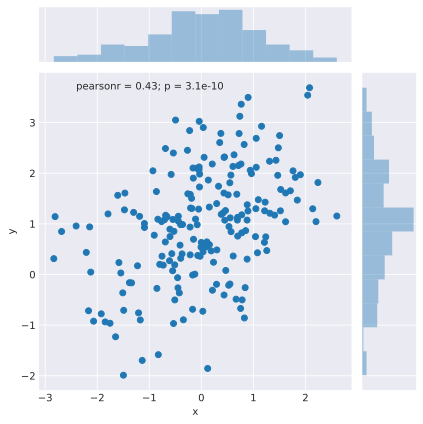

In [13]:
### 观测两个变量之间的关系最好使用“散点图”
sns.jointplot(x="x",y="y",data=df)

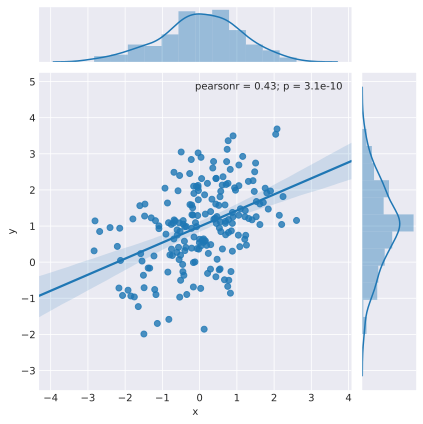

In [16]:
sns.jointplot(x="x",y="y",data=df,kind='reg')

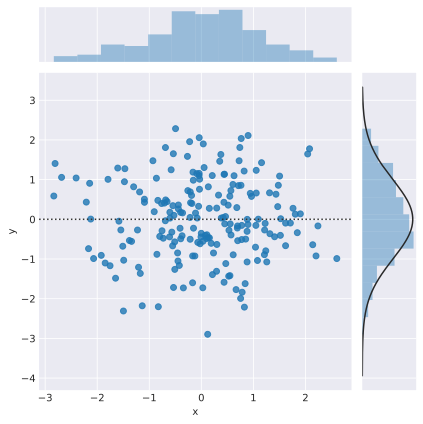

In [17]:
sns.jointplot(x="x",y="y",data=df,kind='resid')

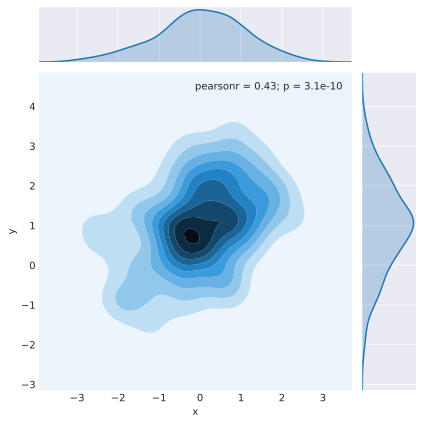

In [18]:
sns.jointplot(x="x",y="y",data=df,kind='kde')

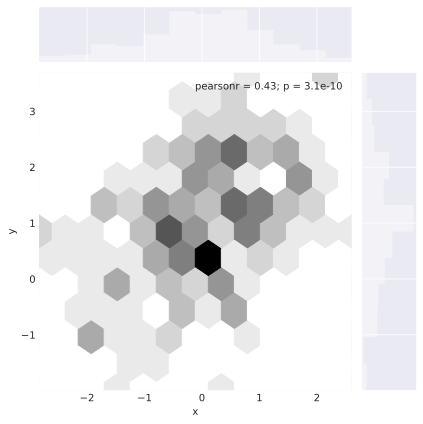

In [25]:
sns.jointplot(x="x",y="y",data=df,kind='hex',color='w')

### Hexbin图

直方图的二元类似物称为“六边形”图，因为它显示了**落在六角形区域内的观察值的计数**。该图对于**较大的数据集效果最好**。它可以通过matplotlib plt.hexbin函数和作为样式jointplot()。它看起来最好用白色背景：

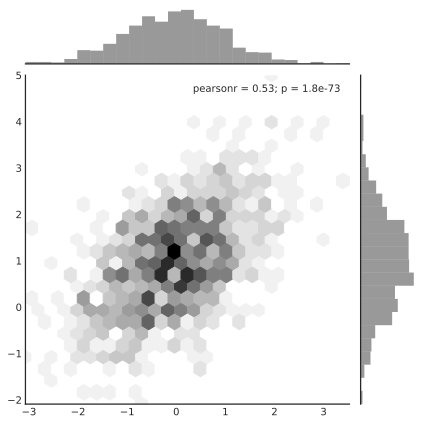

In [21]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

# 3 可视化数据集中的成对关系

In [26]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

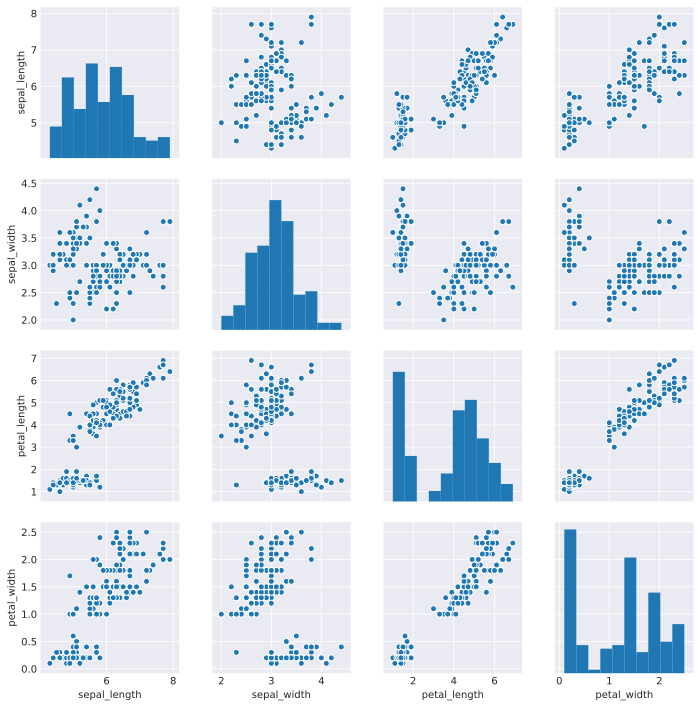

In [28]:
sns.pairplot(iris)